<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [4]:
def present_value(face_value, coupon, discount_rate, years):
    r = discount_rate / 100.0
    c = coupon / 100.0 * face_value   # annual coupon payment in dollars
    xs = jnp.array([1 / (1 + r)**t for t in range(1, years + 1)])
    return face_value / (1 + r)**years + c * jnp.sum(xs)

In [5]:
present_value(1000, 5, 6, 10)

Array(926.3991, dtype=float32)

In [8]:
jax.grad(present_value, argnums=2)(1000.0, 5.0, 6.0, 10)

Array(-70.113884, dtype=float32, weak_type=True)

In [10]:
ix = jnp.linspace(1., 8., 10)
ys = jax.vmap(jax.grad(present_value, argnums=2), in_axes=(None, None, 0, None))(1000.0, 5.0, ix, 10)

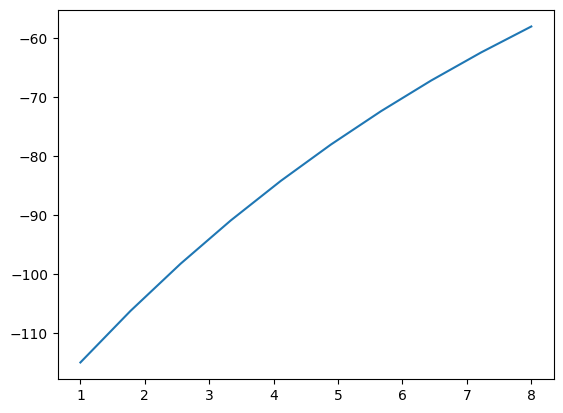

In [11]:
plt.plot(ix, ys)
plt.show()